K Means Clustering with Python
  This notebook is just a code reference for the video lecture and reading.

Method Used
  - K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity.

Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. 

In k means clustering, we have the specify the number of clusters we want the data to be grouped into.

The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster.

Then, the algorithm iterates through two steps: 
    -Reassign data points to the cluster whose centroid is closest. 
    -Calculate new centroid of each cluster.
 
These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

## Import Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Create some Data using make_blobs
- Make_blobs create multiclass datasets by allocating each class one or more normally-distributed clusters of points. 
- Make_blobs provides greater control regarding the centers and standard deviations of each cluster, and is used to demonstrate 
  clustering.
- In real life, any business use case can be created as data and input into K Means Clustering process
   

In [2]:
from sklearn.datasets import make_blobs

In [3]:
# Create Data using make_blobs , 200 samples, 2 features, 8 centers
k_means_data = make_blobs(n_samples=200, n_features=2, 
                           centers=8, cluster_std=1.8,random_state=101)

In [4]:
k_means_data
### the data is actually a tuple

(array([[ -4.84574341,   8.76637011],
        [  4.91004944,  -5.45857663],
        [  3.43930043,  -4.50553996],
        [ -0.87283278,  -7.57934138],
        [  1.4987085 ,  -1.84377653],
        [ 10.06100574,  -3.06104193],
        [ -2.23558906,   6.90402511],
        [ 11.45401305,  -4.73978536],
        [ -9.72307799,  -5.69511115],
        [-10.96986834,  -3.79398414],
        [  7.76581113,  -6.02521809],
        [ -7.64388325,  -4.42353373],
        [ -3.71393356,   7.12491758],
        [ -2.74298212,  -0.67306321],
        [  2.89773526,  -2.36375035],
        [ -5.53533442,   6.76595807],
        [  0.6284009 ,   1.74545508],
        [ -6.68957859,   4.6262114 ],
        [  4.92510284,   6.72492712],
        [  2.57763835,  -8.94596088],
        [-10.45396192,  -4.03635803],
        [  3.99674577,   8.17739004],
        [  4.20669615,   0.3148858 ],
        [ -1.47315723,  -2.37837367],
        [ -8.78726588,  10.61287339],
        [  0.59262074,   0.55034527],
        [  0

In [5]:
### if we extract  a specific value, we see a numpy array
k_means_data[0]

array([[ -4.84574341,   8.76637011],
       [  4.91004944,  -5.45857663],
       [  3.43930043,  -4.50553996],
       [ -0.87283278,  -7.57934138],
       [  1.4987085 ,  -1.84377653],
       [ 10.06100574,  -3.06104193],
       [ -2.23558906,   6.90402511],
       [ 11.45401305,  -4.73978536],
       [ -9.72307799,  -5.69511115],
       [-10.96986834,  -3.79398414],
       [  7.76581113,  -6.02521809],
       [ -7.64388325,  -4.42353373],
       [ -3.71393356,   7.12491758],
       [ -2.74298212,  -0.67306321],
       [  2.89773526,  -2.36375035],
       [ -5.53533442,   6.76595807],
       [  0.6284009 ,   1.74545508],
       [ -6.68957859,   4.6262114 ],
       [  4.92510284,   6.72492712],
       [  2.57763835,  -8.94596088],
       [-10.45396192,  -4.03635803],
       [  3.99674577,   8.17739004],
       [  4.20669615,   0.3148858 ],
       [ -1.47315723,  -2.37837367],
       [ -8.78726588,  10.61287339],
       [  0.59262074,   0.55034527],
       [  0.67140233,   4.97511492],
 

In [6]:
k_means_data[0].shape
### 200 samples and 2 features



(200, 2)

## Visualize Data via Plots

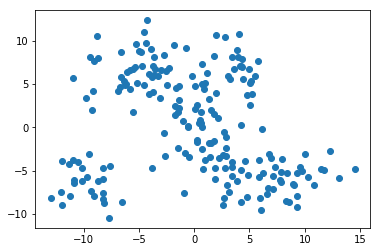

In [7]:
### k_means_data[0][:,0] - grab all the rows in the first column indicated by :,0
### k_means_data[0][:,1] - grab all the rows from second column , :,1
### cmap is color map

plt.scatter(k_means_data[0][:,0],k_means_data[0][:,1])

### note 2 blobs in the plot 

In [27]:
### to grab the second item in the tupe k_means_data
k_means_data[1]

### you could see values 0,1,2,3 which is created because we gave centers=4 while defining the blob

array([3, 4, 4, 5, 5, 7, 3, 7, 1, 1, 7, 1, 3, 0, 5, 6, 0, 6, 2, 4, 1, 2,
       0, 5, 3, 0, 0, 0, 6, 0, 7, 3, 5, 0, 3, 5, 3, 3, 1, 2, 0, 5, 1, 7,
       5, 3, 5, 5, 1, 1, 4, 3, 2, 6, 5, 1, 4, 0, 7, 4, 4, 6, 7, 2, 7, 5,
       1, 1, 2, 3, 4, 4, 5, 3, 7, 2, 7, 4, 7, 1, 3, 3, 3, 4, 6, 0, 6, 2,
       6, 2, 4, 5, 5, 1, 7, 0, 1, 5, 4, 7, 4, 0, 4, 0, 1, 3, 7, 7, 2, 2,
       6, 2, 3, 4, 7, 1, 2, 6, 6, 2, 5, 6, 1, 2, 0, 1, 6, 1, 3, 3, 7, 7,
       1, 7, 0, 2, 3, 6, 3, 0, 3, 3, 0, 4, 6, 4, 5, 1, 2, 4, 2, 6, 7, 4,
       1, 2, 7, 7, 6, 7, 0, 5, 1, 6, 6, 4, 4, 6, 5, 1, 4, 0, 1, 6, 2, 0,
       0, 5, 6, 6, 0, 5, 0, 2, 4, 0, 6, 5, 5, 3, 5, 7, 7, 6, 2, 2, 4, 2,
       3, 2])

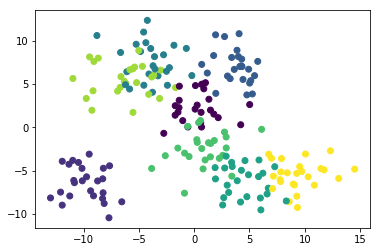

In [8]:
plt.scatter(k_means_data[0][:,0],k_means_data[0][:,1],c=k_means_data[1])

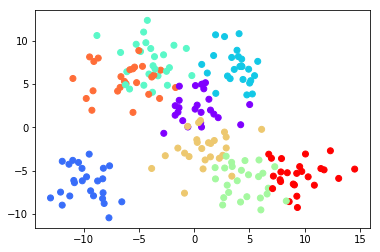

In [9]:
plt.scatter(k_means_data[0][:,0],k_means_data[0][:,1],c=k_means_data[1],cmap='rainbow')

In [ ]:
### we could see above the the blob in "light blue" is very distinct, but the other 3 are a littie distorted

## Creating the Clusters

In [10]:
### scikit learn library for KMeans clustering.
from sklearn.cluster import KMeans

In [11]:
# KMeans is unsupervised 
##Then, the algorithm iterates through two steps: 
##  -Reassign data points to the cluster whose centroid is closest. 
##    -Calculate new centroid of each cluster.
## K Means requires the clusters to be defined ahead. in this case we created clusters ourselves. 
### define a new variable kmeans_var
kmeans_var = KMeans(n_clusters=8)

In [14]:
### fit the model to features. 
kmeans_var.fit(k_means_data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
### gives us the cluster centers (centroids)
kmeans_var.cluster_centers_

array([[ 3.85048114,  6.9229514 ],
       [ 4.04681723, -6.34089201],
       [-6.95426312,  5.05702781],
       [-9.76750125, -6.4197268 ],
       [ 9.31072911, -5.58182312],
       [ 0.86446829, -1.87750318],
       [-4.07673748,  8.10391969],
       [-0.14755263,  3.16243769]])

In [15]:
k_means_data[1]

array([3, 4, 4, 5, 5, 7, 3, 7, 1, 1, 7, 1, 3, 0, 5, 6, 0, 6, 2, 4, 1, 2,
       0, 5, 3, 0, 0, 0, 6, 0, 7, 3, 5, 0, 3, 5, 3, 3, 1, 2, 0, 5, 1, 7,
       5, 3, 5, 5, 1, 1, 4, 3, 2, 6, 5, 1, 4, 0, 7, 4, 4, 6, 7, 2, 7, 5,
       1, 1, 2, 3, 4, 4, 5, 3, 7, 2, 7, 4, 7, 1, 3, 3, 3, 4, 6, 0, 6, 2,
       6, 2, 4, 5, 5, 1, 7, 0, 1, 5, 4, 7, 4, 0, 4, 0, 1, 3, 7, 7, 2, 2,
       6, 2, 3, 4, 7, 1, 2, 6, 6, 2, 5, 6, 1, 2, 0, 1, 6, 1, 3, 3, 7, 7,
       1, 7, 0, 2, 3, 6, 3, 0, 3, 3, 0, 4, 6, 4, 5, 1, 2, 4, 2, 6, 7, 4,
       1, 2, 7, 7, 6, 7, 0, 5, 1, 6, 6, 4, 4, 6, 5, 1, 4, 0, 1, 6, 2, 0,
       0, 5, 6, 6, 0, 5, 0, 2, 4, 0, 6, 5, 5, 3, 5, 7, 7, 6, 2, 2, 4, 2,
       3, 2])

In [16]:

kmeans_var.labels_


### reports the predicted labels that kmeans clustering believes to be true

array([1, 4, 4, 4, 0, 3, 1, 3, 2, 2, 3, 2, 1, 0, 0, 1, 5, 7, 6, 4, 2, 6,
       0, 0, 1, 0, 5, 5, 7, 0, 3, 7, 0, 5, 1, 0, 1, 1, 2, 6, 5, 0, 2, 3,
       0, 1, 0, 0, 2, 2, 4, 5, 6, 5, 0, 2, 4, 5, 3, 4, 4, 1, 3, 6, 3, 0,
       2, 2, 6, 7, 4, 4, 0, 7, 3, 6, 3, 4, 3, 2, 1, 1, 5, 4, 7, 0, 1, 6,
       7, 6, 4, 0, 0, 2, 3, 5, 2, 0, 4, 3, 4, 6, 4, 5, 2, 7, 3, 3, 6, 6,
       7, 6, 1, 4, 3, 2, 6, 7, 7, 6, 0, 7, 2, 6, 5, 2, 7, 2, 1, 1, 3, 3,
       2, 3, 5, 6, 1, 7, 1, 0, 7, 1, 5, 3, 7, 4, 4, 2, 5, 4, 6, 7, 3, 4,
       2, 6, 3, 3, 1, 3, 5, 0, 2, 7, 7, 4, 0, 1, 0, 2, 4, 5, 2, 1, 6, 5,
       5, 0, 1, 7, 5, 0, 5, 6, 4, 5, 5, 0, 0, 1, 0, 3, 3, 7, 6, 6, 3, 6,
       1, 6])

In [ ]:
###Compare between what Kmeans predicted and What we had originally 

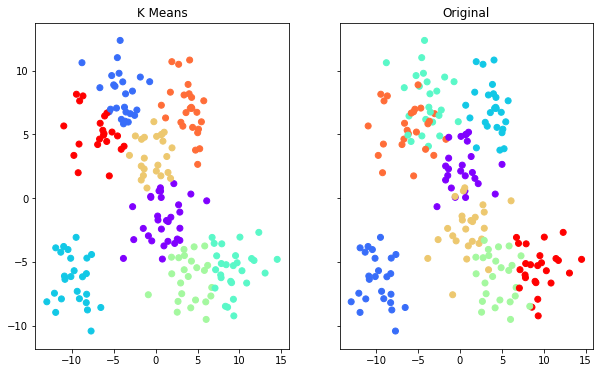

In [17]:
### create a subplot of 1 row by 2 columns
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))

### setting the axis as K Means for one subplot
ax1.set_title('K Means')

### create a scatter plot original data but colors the data based of the kmeans_labels_ which was created by kmeans algorithm
ax1.scatter(k_means_data[0][:,0],k_means_data[0][:,1],c=kmeans_var.labels_,cmap='rainbow')

### setting the axis as Original for one subplot
ax2.set_title("Original")

### create a scatter plot original data but colors the data based of thea actual labels
ax2.scatter(k_means_data[0][:,0],k_means_data[0][:,1],c=k_means_data[1],cmap='rainbow')

### Note that the color here is of no significance in terms of clustering. its just a graphical representation

### we can see kmeans and the original graphs are the same.

### we can run the iteration by increasing the k value and re running the entire operation

### remember wee will not always have the originally labelled data like we had. so we will go by what K means actually concludes for us.

